In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("https://github.com/ndzadz/mgr/blob/main/data_us_1990_2022.csv?raw=true",encoding="latin1",sep=";",header=0)

In [17]:
data = data.rename(columns={'ï»¿Dis No':'Dis No'})

In [18]:
data.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)',
       'CPI'],
      dtype='object')

In [19]:
data[data['Insured Damages (\'000 US$)'].isna()==0]

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI
21,1991-0535-CAN,1991,535,NaN,Natural,Meteorological,Storm,Convective storm,Hail,NaN,...,NaN,NaN,NaN,NaN,NaN,347000.0,745649.0,500000.0,1074423.0,46.536621
67,1992-0024-ECU,1992,24,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,...,125000.0,80000.0,205000.0,NaN,NaN,2500.0,5214.0,20000.0,41713.0,47.946130
76,1993-0010-CHL,1993,10,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,...,1993.0,1225.0,3276.0,NaN,NaN,34000.0,68880.0,34000.0,68880.0,49.361332
85,1993-0012-CUB,1993,12,NaN,Natural,Meteorological,Storm,Convective storm,Winter storm/Blizzard,NaN,...,149680.0,NaN,149775.0,NaN,NaN,5000.0,10129.0,1000000.0,2025877.0,49.361332
93,1993-0014-ECU,1993,14,NaN,Natural,Hydrological,Landslide,Landslide,NaN,NaN,...,75000.0,NaN,75020.0,NaN,NaN,15000.0,30388.0,500000.0,1012939.0,49.361332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,2021-0551-USA,2021,551,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical storm 'Ida',...,14000.0,NaN,14000.0,NaN,NaN,36000000.0,38881008.0,65000000.0,70201819.0,92.590193
2854,2021-0797-USA,2021,797,NaN,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,...,NaN,NaN,100.0,NaN,NaN,4000000.0,4320112.0,5200000.0,5616146.0,92.590193
2892,2022-0157-USA,2022,157,NaN,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,...,NaN,NaN,50.0,NaN,NaN,2300000.0,2300000.0,3000000.0,3000000.0,100.000000
2950,2022-0614-USA,2022,614,TC-2022-000320,Natural,Meteorological,Storm,Tropical cyclone,NaN,Hurricane 'Ian',...,NaN,NaN,NaN,NaN,NaN,60000000.0,60000000.0,100000000.0,100000000.0,100.000000


Liczba zdarzeń w każdym roku

In [24]:
data.groupby("Year").count()['Dis No']

Year
1990     68
1991     83
1992     77
1993     77
1994     52
1995     95
1996     65
1997     82
1998    103
1999     93
2000    101
2001     95
2002    118
2003     89
2004     89
2005     94
2006     75
2007    103
2008    102
2009     84
2010    111
2011     97
2012     84
2013     79
2014     80
2015     94
2016     85
2017    101
2018     68
2019     88
2020     92
2021    130
2022    119
Name: Dis No, dtype: int64

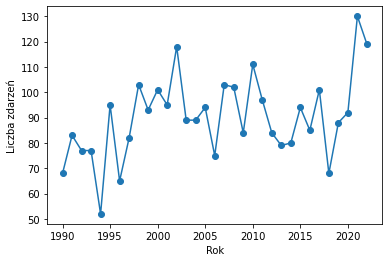

In [25]:
plt.plot(data.groupby("Year").count()["Dis No"], linestyle= '-',marker='o')
plt.xlabel("Rok")
plt.ylabel("Liczba zdarzeń")
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\no_tot.pdf")
plt.show()

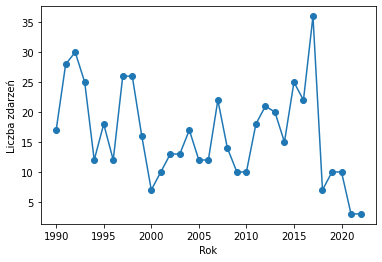

In [26]:
plt.plot(data[data['Insured Damages (\'000 US$)'].isna()==0].groupby("Year").count()["Dis No"], linestyle= '-',marker='o')
plt.xlabel("Rok")
plt.ylabel("Liczba zdarzeń")
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\no_tot_dam.pdf")
plt.show()

In [ ]:
def first_negative(lst):
    res = [i for i,x in enumerate(lst) if x<0]
    return None if res == [] else res[0]

In [14]:
def ruin(u, theta, t_max, lambd, distribution, params):
    N = HPP(t_max,lambd)
    if distribution == "lognorm":
        C = lambd*(np.exp(params[0]+params[1]**2/2))*(1+theta)
        X = scipy.stats.lognorm.rvs(params[1],size=int(max(N['N'])),loc=params[0])
    elif distribution == "exponential":
        C = lambd*(1/params[0])*(1+theta)
        X = scipy.stats.expon.rvs(size=int(max(N['N'])),scale=1/params[0])
    elif distribution == "gamma":
        C = lambd*(params[0]/params[1])*(1+theta)
        X = scipy.stats.gamma.rvs(size=int(max(N['N'])),shpape=params[0],scale=1/params[1])   
    elif distribution == "weibull":
        C = lambd*(params[0]*scipy.special.gamma(1+1/params[1]))*(1+theta)
        X = scipy.stats.weibull_max.rvs(size=int(max(N['N'])),loc=params[0],scale=params[1])
    # elif distribution == "burr":
    #     C = lambd*(np.exp(params[0]+params[1]^2/2))*(1+theta)
    #     X = scipy.stats.lognorm.rvs(size=int(max(N['N'])),loc=params[0],scale=params[1])   
    C_t = np.array(C*N['N'])
    S = np.insert(np.cumsum(X),0,0.0)
    R_temp = u + C - S
    ruin_time = first_negative(R_temp)
    if ruin_time != None:
        R = R_temp[0:ruin_time+1]
    else:
        R = R_temp
    return([R,ruin_time])


In [15]:
ruin(100,0.2,100,2,"lognorm",[0,1])

[array([103.95693105, 102.75168643, 102.28706705, 101.69506783,
         97.48070427,  95.72963504,  85.30080248,  83.70382541,
         83.31050628,  82.53202622,  82.13174385,  81.82873976,
         81.39867804,  80.86994235,  80.52990927,  80.09688347,
         79.75874291,  78.21621646,  72.43206229,  70.24420594,
         69.03698518,  68.28259197,  67.0542704 ,  60.2973353 ,
         58.21233156,  54.69182884,  54.56898598,  53.85924678,
         53.36463435,  52.81723341,  52.17731312,  50.6668754 ,
         49.23552519,  46.86391462,  46.29735246]),
 None]

In [16]:
def ruin_simulations(n, u, theta, t_max, lambd, distribution, params):
    S = 0
    for i in range(n):
        if ruin(u, theta, t_max, lambd, distribution, params)[1] != None:
            S += 1
    return(S/n)

In [20]:
p = np.empty(0)
for n in range(50,500,50):
    p = np.insert(p,len(p),ruin_simulations(n,10,0.2,100,1,"lognorm",[0,1]))

Text(0, 0.5, 'Prawdopodobieństwo ruiny')

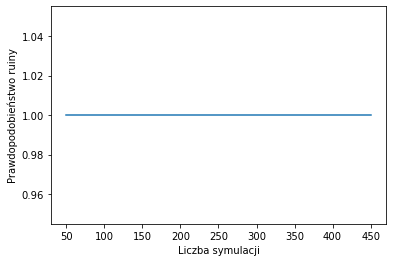

In [27]:
fig, ax = plt.subplots(1, 1)
ax.plot(range(50,500,50),p)
plt.xlabel("Liczba symulacji")
plt.ylabel("Prawdopodobieństwo ruiny")

In [30]:
data[['Start Year', 'Start Month', 'Start Day']]

,Start Year,Start Month,Start Day
0,1990,5.0,22.0
1,1990,7.0,1.0
2,1990,2.0,13.0
3,1990,2.0,25.0
4,1990,2.0,28.0
...,...,...,...
2522,2022,4.0,12.0
2523,2022,4.0,6.0
2524,2022,4.0,NaN
2525,2022,7.0,20.0


In [50]:
data['date'] = pd.to_datetime(dict(year=data['Start Year'].astype(int), month=data['Start Month'].fillna(6).astype(int), day=data['Start Day'].fillna(15).astype(int)))
data['date_min'] = min(data['date'])
data['t'] = data['date'].dt.to_period('M').astype(int) - data['date_min'].dt.to_period('M').astype(int)


C:\Users\ndzad\AppData\Local\Temp/ipykernel_29100/2846589246.py:3: FutureWarning: casting period[M] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  data['t'] = data['date'].dt.to_period('M').astype(int) - data['date_min'].dt.to_period('M').astype(int)


In [51]:
data.head()

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations,date,date_min,t
0,1990-0361-AUT,1990,361,NaN,Natural,Meteorological,Storm,Convective storm,Severe storm,NaN,...,NaN,NaN,"48,21879729",NaN,NaN,NaN,NaN,1990-05-22,1990-01-09,4
1,1990-0376-AUT,1990,376,NaN,Natural,Meteorological,Storm,Convective storm,Severe storm,NaN,...,NaN,NaN,"48,21879729",NaN,NaN,NaN,NaN,1990-07-01,1990-01-09,6
2,1990-0721-AUT,1990,721,NaN,Natural,Meteorological,Storm,NaN,NaN,Ottilie and Polly,...,10000.0,20739.0,"48,21879729",NaN,NaN,NaN,NaN,1990-02-13,1990-01-09,1
3,1990-0722-AUT,1990,722,NaN,Natural,Meteorological,Storm,NaN,NaN,Vivian,...,120000.0,248866.0,"48,21879729",NaN,NaN,NaN,NaN,1990-02-25,1990-01-09,1
4,1990-0723-AUT,1990,723,NaN,Natural,Meteorological,Storm,NaN,NaN,Wiebke,...,120000.0,248866.0,"48,21879729",NaN,NaN,NaN,NaN,1990-02-28,1990-01-09,1


Brudnopis

0.6448541406851352

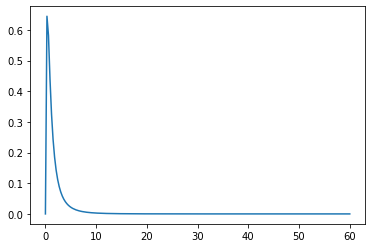

In [56]:
stddev = 1
mean = 0
dist=scipy.stats.lognorm([stddev],loc=mean)
x=np.linspace(0,60,200)
plt.plot(x,dist.pdf(x))
np.max(dist.pdf(x))